<a href="https://colab.research.google.com/github/anneaiad/Challenge_Telecom_X_Alura/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [149]:
import pandas as pd

In [150]:
#Extrair os dados do API
dados = pd.read_json('/content/TelecomX_Data.json')
dados


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# 🔧 Transformação de Dados

In [151]:
#Verificar nomes das colunas, valores nulos e tipo de dados a serem tratados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [152]:
#Definir a lista de colunas aninhadas a serem tratadas
colunas = ['customer', 'phone', 'internet', 'account']

In [153]:
#Normalizar as colunas aninhadas
df_expandido = dados.copy()

for col in colunas:
    normalizado = pd.json_normalize(df_expandido[col])
    normalizado.columns = [f"{col}_{sub}" for sub in normalizado.columns]
    df_expandido = pd.concat([df_expandido.drop(columns=[col]), normalizado], axis=1)

In [154]:
df_expandido.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [155]:
df = df_expandido
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [156]:
#Salvar uma cópia do df para CSV
df.to_csv('df_normalizado.csv', index=False)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [158]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print()

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: customer_gender
['Female' 'Male']

Coluna: customer_SeniorCitizen
[0 1]

Coluna: customer_Partner
['Yes' 'No']

Coluna: customer_Dependents
['Yes' 'No']

Coluna: customer_tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Coluna: phone_PhoneService
['Yes' 'No']

Coluna: phone_MultipleLines
['No' 'Yes' 'No phone service']

Coluna: internet_InternetService
['DSL' 'Fiber optic' 'No']

Coluna: internet_OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: internet_OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: internet_DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: internet_TechSupport
['Yes' 'No' 'No internet service']

Coluna: internet_Stre

In [159]:
import numpy as np

In [160]:
#Tratar string vazia como NaN
df['Churn'] = df['Churn'].replace('', np.nan)


In [161]:
#Remover as linhas NaN para transformar a coluna em tipo bool
df = df.dropna(subset=['Churn'])
df.reset_index(inplace=True, drop=True)


In [162]:
#Listar todas as colunas de "sim" ou "não" para transformar em tipo bool
colunas_sim_nao = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
colunas_sim_nao

['Churn',
 'customer_Partner',
 'customer_Dependents',
 'phone_PhoneService',
 'account_PaperlessBilling']

In [163]:
#Usar o map e o dicionário para transformar as palavras "Yes" e "No" em "True" ou "False"
for col in colunas_sim_nao:
    df[col] = df[col].map({'Yes': True, 'No': False})

/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': True, 'No': False})
/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': True, 'No': False})
/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [164]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total         object
dtype: object


In [165]:
#Transformar os dados 0 e 1 em Falso ou True
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0:False, 1:True})

/tmp/ipython-input-3777225341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0:False, 1:True})


In [166]:
#Transformar a coluna customer_SeniorCitizen para o tipo bool
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype(bool)


/tmp/ipython-input-4007585460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype(bool)


In [167]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.3
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.4
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.4


In [168]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen          bool
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total         object
dtype: object


In [169]:
#Verificar se tem "," na coluna account_Charges.Total pois se trata de um dataFrame de língua inglesa
df['account_Charges.Total'].str.contains(',').sum()

np.int64(0)

In [170]:
#Transformar a coluna em numérica
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


/tmp/ipython-input-1149699027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


In [171]:
#Transformar para float
df['account_Charges.Total'] = df['account_Charges.Total'].astype(float)

/tmp/ipython-input-2436792186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_Charges.Total'] = df['account_Charges.Total'].astype(float)


In [172]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen          bool
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total        float64
dtype: object


In [173]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


#📊 Carga e análise

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
#Verificar quantos clientes saíram e quantos ficaram
print(df['Churn'].value_counts())


Churn
False    5174
True     1869
Name: count, dtype: int64


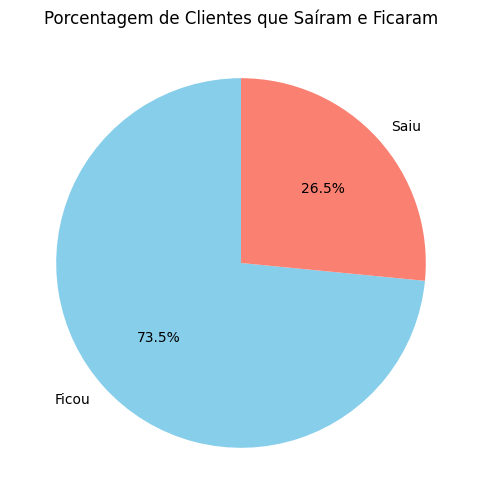

In [204]:
import matplotlib.pyplot as plt

# Contar quantos clientes saíram e ficaram
contagem = df['Churn'].value_counts()

# Definir labels e cores
labels = ['Ficou', 'Saiu']
cores = ['skyblue', 'salmon']

# Criar o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Clientes que Saíram e Ficaram')
plt.show()


In [175]:
print(df.groupby('account_PaymentMethod')['Churn'].value_counts())


account_PaymentMethod      Churn
Bank transfer (automatic)  False    1286
                           True      258
Credit card (automatic)    False    1290
                           True      232
Electronic check           False    1294
                           True     1071
Mailed check               False    1304
                           True      308
Name: count, dtype: int64


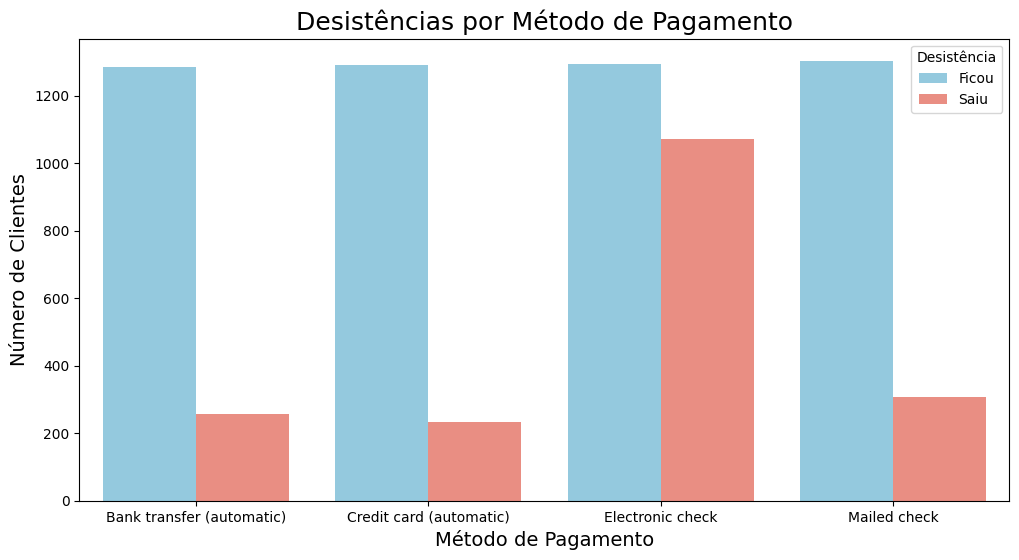

In [197]:
#Criar um gráfico de barras agrupadas para melhor vizualização dos dados
churn_metodo_pagamento = df.groupby(['account_PaymentMethod', 'Churn']).size().reset_index(name='counts')

palette = {False: "skyblue", True: "salmon"}

plt.figure(figsize=(12,6))
sns.barplot(x='account_PaymentMethod', y='counts', hue='Churn', data=churn_metodo_pagamento, palette=palette)
plt.title('Desistências por Método de Pagamento', fontsize=18)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xlabel('Método de Pagamento', fontsize=14)

handles, labels = ax.get_legend_handles_labels()
labels = ['Ficou', 'Saiu']
plt.legend(handles, labels, title='Desistência')

plt.show()

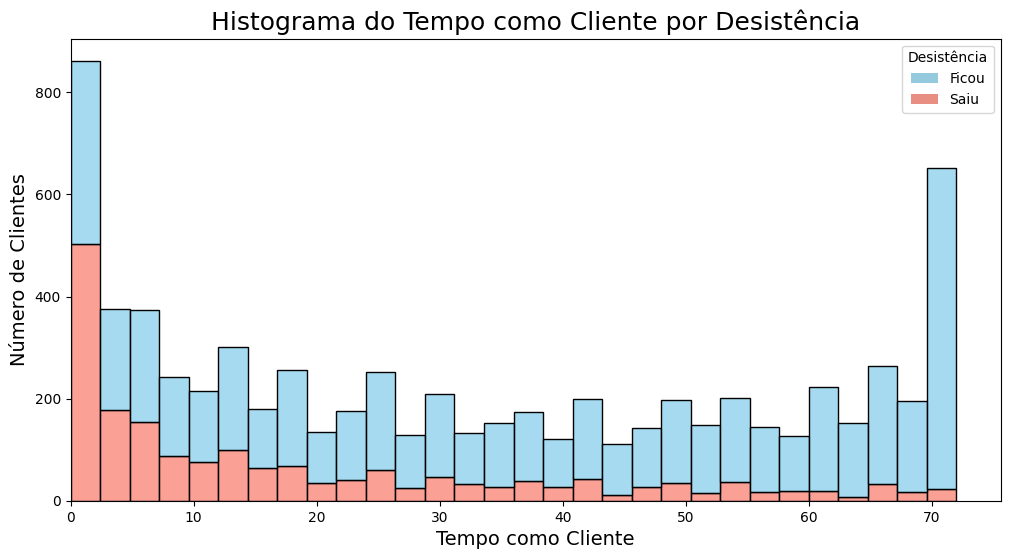

In [236]:
palette = {False: "skyblue", True: "salmon"}
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='customer_tenure', hue='Churn', multiple='stack', bins=30, palette=palette)
plt.title('Histograma do Tempo como Cliente por Desistência', fontsize=18)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xlabel('Tempo como Cliente', fontsize=14)
plt.xlim(left=0)

handles, labels = ax.get_legend_handles_labels()
labels = ['Ficou', 'Saiu']
plt.legend(handles, labels, title='Desistência')
plt.show()


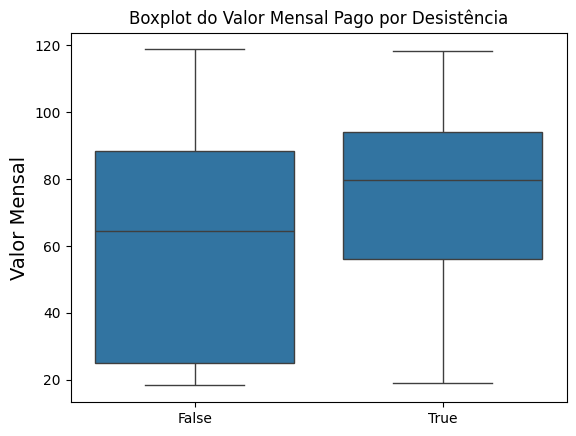

In [239]:
sns.boxplot(x='Churn', y='account_Charges.Monthly', data=df)
plt.title('Boxplot do Valor Mensal Pago por Desistência')
plt.ylabel('Valor Mensal', fontsize=14)
plt.xlabel('')
plt.show()


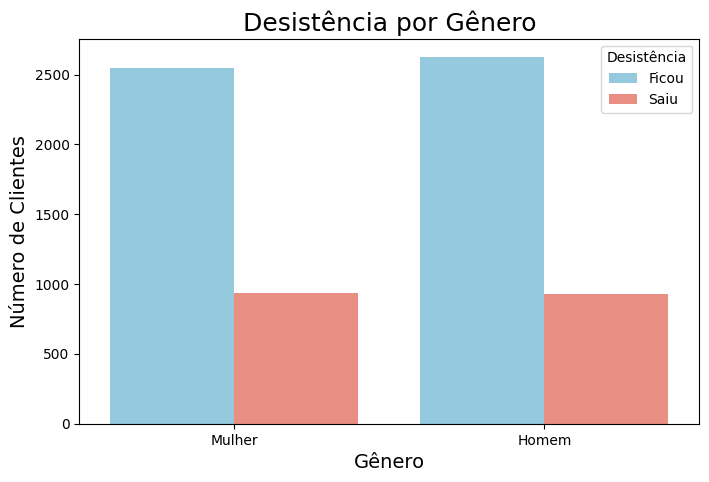

In [240]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_gender', hue='Churn', data=df, palette=palette)
plt.title('Desistência por Gênero', fontsize=18)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.legend(title='Desistência', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1], labels=['Mulher', 'Homem'])
plt.show()

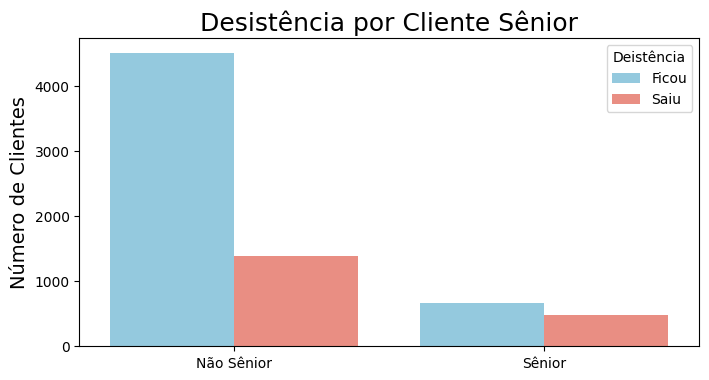

In [241]:
plt.figure(figsize=(8,4))
sns.countplot(x='customer_SeniorCitizen', hue='Churn', data=df, palette=palette)
plt.title('Desistência por Cliente Sênior', fontsize=18)
plt.xlabel('')
plt.ylabel('Número de Clientes', fontsize=14)
plt.legend(title='Deistência', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1], labels=['Não Sênior', 'Sênior'])
plt.show()

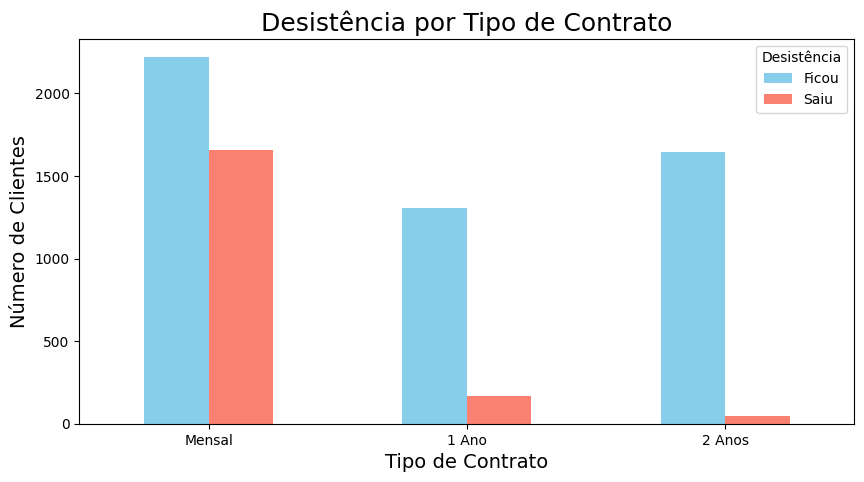

In [249]:
churn_contrato = df.groupby(['account_Contract', 'Churn']).size().unstack()

churn_contrato.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10,5))
plt.title('Desistência por Tipo de Contrato', fontsize=18)
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.legend(title='Desistência', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1, 2], labels=['Mensal', '1 Ano', '2 Anos'])
plt.xticks(rotation=0)
plt.show()




In [250]:
col_servicos_sim_nao = ['phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

In [253]:
df_servicos = df[col_servicos_sim_nao].copy()


In [257]:
for col in col_servicos_sim_nao:
    df_servicos[col] = df_servicos[col].replace({
        'Yes': True,
        'No': False,
        'No internet service': False,
        'No phone service': False,
        'Fiber optic': True,
        'DSL': True
    }).infer_objects()

In [261]:
df_servicos['qtd_servicos'] = df_servicos.sum(axis=1)



In [264]:
df_servicos['Churn'] = df['Churn']



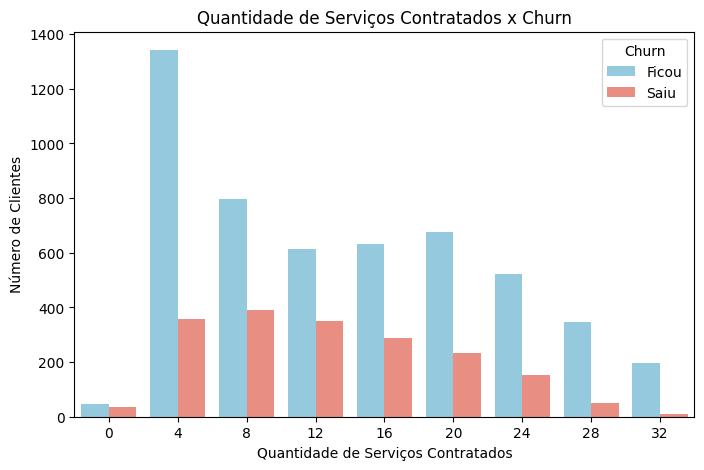

In [265]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='qtd_servicos', hue='Churn', data=df_servicos, palette={False:'skyblue', True:'salmon'})
plt.title('Quantidade de Serviços Contratados x Churn')
plt.xlabel('Quantidade de Serviços Contratados')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Ficou', 'Saiu'])

#📄Relatorio Final